In [ ]:
# @title imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# @title Template matching
# img_rgb = cv2.imread('/content/gdrive/MyDrive/Template_matching/messi5.jpg',)
img_rgb = cv2.imread('/content/gdrive/MyDrive/Template_matching/Untitled design.png',)

# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template
# template = cv2.imread('/content/drive/MyDrive/Template_matching/Template.jpg',0)
template = cv2.imread('/content/gdrive/MyDrive/Template_matching/Hearts_template.jpg',0)

# Store width and height of template in w and h
w, h = template.shape[::-1]
img = img_gray.copy()

res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc

bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,top_left, bottom_right, 255, 2)


#All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img_gray.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

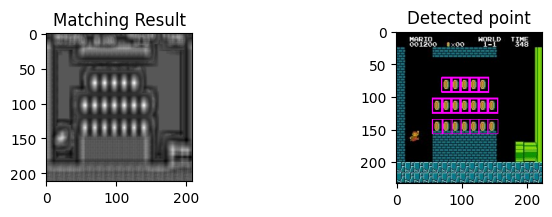

In [ ]:
# @title Multiple Objects with Template Matching

img_rgb = cv2.imread('/content/gdrive/MyDrive/Template_matching/uXTKk.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/gdrive/MyDrive/Template_matching/mario_coin3.png', cv2.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.8

# Get all locations where the correlation coefficient >= threshold
loc = np.where(res >= threshold)

rectangles = []

# iterate over all the locations from np.where()
for pt in zip(*loc[::-1]):
    rectangles.append([pt[0], pt[1], w, h])

rectangles = np.array(rectangles)

# Check for duplicated rectangles
if len(rectangles) > 1:
    rectangles, weights = cv2.groupRectangles(rectangles.tolist(), 0, 0.1)

for (x, y, w, h) in rectangles:
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 255), 1)


plt.subplot(131)
plt.imshow(res, cmap='gray')
plt.title('Matching Result')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title('Detected point')

# plt.subplot(133)
# plt.imshow(template, cmap='gray')
# plt.title('Template')

plt.show()


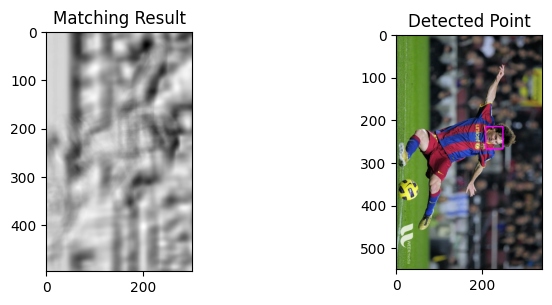

In [ ]:
# @title Rotation with Template Matching

# Function to rotate an image by a specified angle
def Rotation(angle, img):
    centerPoint = tuple(np.array(img.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(centerPoint, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, img.shape[1::-1], flags=cv2.INTER_NEAREST)
    return rotated_img

img = cv2.imread('/content/gdrive/MyDrive/Template_matching/messi5 (1).jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/gdrive/MyDrive/Template_matching/Template.jpg', cv2.IMREAD_GRAYSCALE)

# to keep track of the maximum correlation value and corresponding location
currVal = -1
top_left = None

# Iterate over the angles from 0 -> 359 degrees
for angle in range(0, 360):
    # Rotate the template by the current angle
    rotated_template = Rotation(angle, template)

    res = cv2.matchTemplate(img_gray, rotated_template, cv2.TM_CCORR_NORMED)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # if a higher value is found -> update maximum correlation (value & location)
    if max_val > currVal:
        currVal = max_val
        w, h = rotated_template.shape[::-1]
        top_left = max_loc
        bottom_right = [top_left[0] + w, top_left[1] + h]

cv2.rectangle(img, top_left, bottom_right, (255, 0, 255), 2)


plt.subplot(131)
plt.imshow(res, cmap='gray')
plt.title('Matching Result')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Point')

plt.show()


In [ ]:
# @title Rescaling with Template Matching

img = cv2.imread('/content/gdrive/MyDrive/Template_matching/Untitled design.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/gdrive/MyDrive/Template_matching/Hearts_template.jpg', cv2.IMREAD_GRAYSCALE)

# a range of scales to try (from 0.05 to 20 draw 40 values)
scales = np.linspace(0.05, 20, 40)

# to keep track of the best match
curr_scale = 1.0
curr_match = None

# iter over the scales
for s in scales:

    resized_temp = cv2.resize(template, (0, 0), fx=s, fy=s)

    # if the resized template is larger than the original image (in height or width) -> Break
    if resized_temp.shape[0] > img_gray.shape[0] or resized_temp.shape[1] > img_gray.shape[1]:
        break

    res = cv2.matchTemplate(img_gray, resized_temp, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if curr_match is None or max_val > curr_match[0]:
        curr_match = (max_val, max_loc, s)

if curr_match is not None:
    max_val, max_loc, curr_scale = curr_match
    w, h = (np.array(template.shape[::-1]) * curr_scale).astype(int)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, (255, 0, 255), 2)

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected point')

    plt.subplot(133)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')

    plt.show()


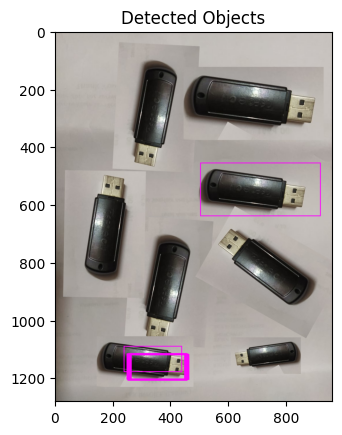

In [ ]:
# @title Multiple objects, Rotation, Rescaling
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_objects(image_path, template_path, scale_factor=1.0, threshold=0.8):

    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

    # Multiple Objects
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    rectangles = []
    for pt in zip(*loc[::-1]):
        rectangles.append([pt[0], pt[1], w, h])
    rectangles = np.array(rectangles)
    if len(rectangles) > 1:
        rectangles, weights = cv2.groupRectangles(rectangles.tolist(), 0, 0.1)
    for (x, y, w, h) in rectangles:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 1)

    # Rotation
    currVal = -1
    top_left = None
    for angle in range(0, 360):
        rotated_template = cv2.warpAffine(template, cv2.getRotationMatrix2D((w / 2, h / 2), angle, scale_factor), (w, h))
        res_rotate = cv2.matchTemplate(img_gray, rotated_template, cv2.TM_CCORR_NORMED)
        min_val_rotate, max_val_rotate, min_loc_rotate, max_loc_rotate = cv2.minMaxLoc(res_rotate)
        if max_val_rotate > currVal:
            currVal = max_val_rotate
            w_rotate, h_rotate = rotated_template.shape[::-1]
            top_left = max_loc_rotate
            bottom_right = [top_left[0] + w_rotate, top_left[1] + h_rotate]
    cv2.rectangle(img, top_left, bottom_right, (255, 0, 255), 2)

    # Rescaling
    scales = np.linspace(0.05, 10, 50)
    curr_scale = 1.0
    curr_match = None
    for s in scales:
        resized_temp = cv2.resize(template, (0, 0), fx=s, fy=s)
        if resized_temp.shape[0] > img_gray.shape[0] or resized_temp.shape[1] > img_gray.shape[1]:
            break
        res_rescale = cv2.matchTemplate(img_gray, resized_temp, cv2.TM_CCORR_NORMED)
        min_val_rescale, max_val_rescale, min_loc_rescale, max_loc_rescale = cv2.minMaxLoc(res_rescale)
        if curr_match is None or max_val_rescale > curr_match[0]:
            curr_match = (max_val_rescale, max_loc_rescale, s)
    if curr_match is not None:
        max_val_rescale, max_loc_rescale, curr_scale = curr_match
        w_rescale, h_rescale = (np.array(template.shape[::-1]) * curr_scale).astype(int)
        top_left_rescale = max_loc_rescale
        bottom_right_rescale = (top_left_rescale[0] + w_rescale, top_left_rescale[1] + h_rescale)
        cv2.rectangle(img, top_left_rescale, bottom_right_rescale, (255, 0, 255), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Objects')
    plt.show()

detect_objects('/content/gdrive/MyDrive/Template_matching/e4mQ5.jpg', '/content/gdrive/MyDrive/Template_matching/UR06K.jpg', scale_factor=1.5, threshold=0.7)


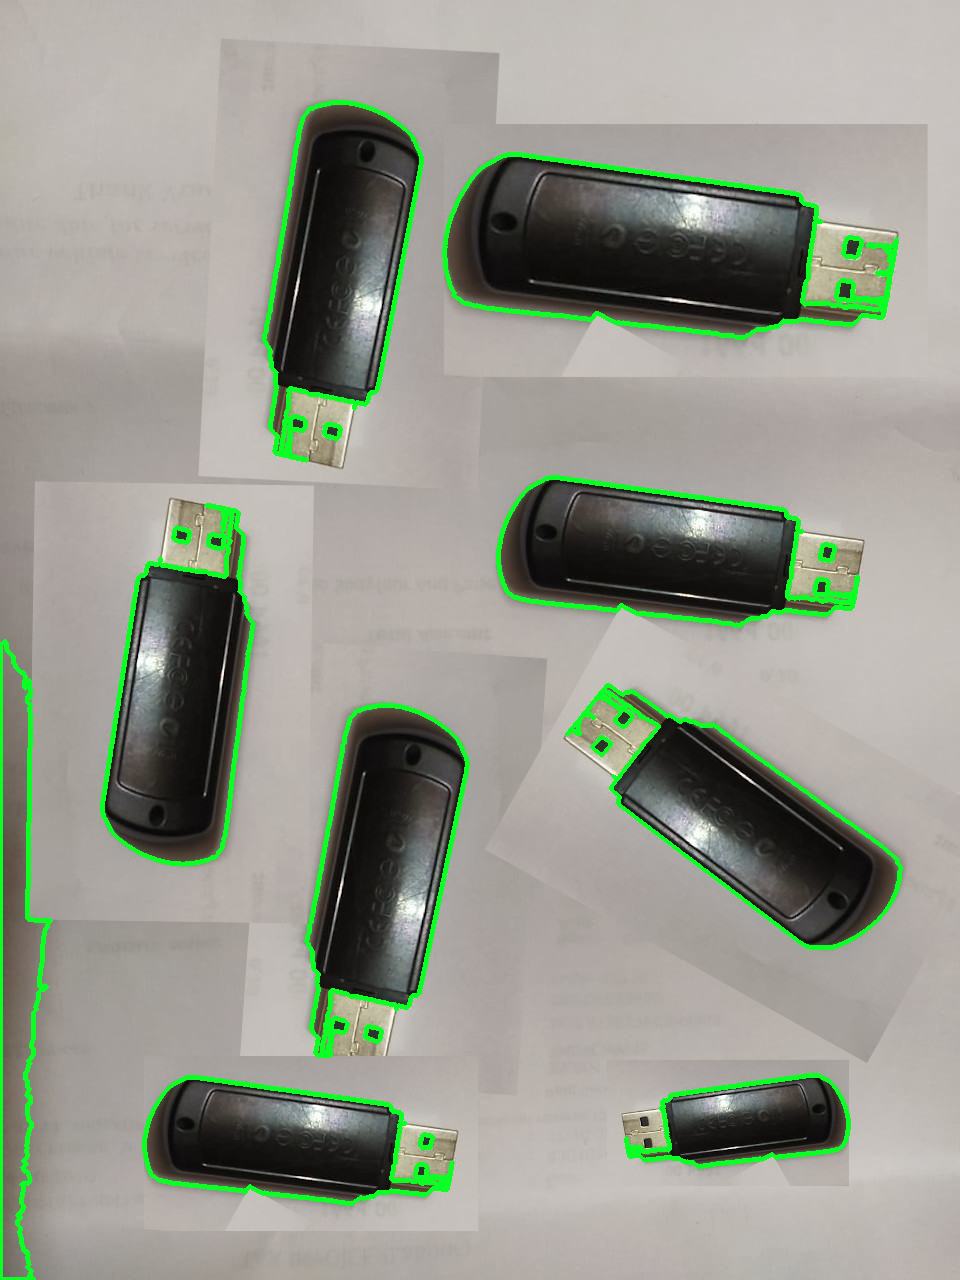

In [14]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # Load the images
# image = cv2.imread('/content/gdrive/MyDrive/Template_matching/e4mQ5.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# template = cv2.imread('/content/gdrive/MyDrive/Template_matching/UR06K.jpg', cv2.IMREAD_GRAYSCALE)
# result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)

# # Set a threshold to determine matches
# threshold = 0.8
# loc = np.where(result >= threshold)

# # Create a list to store match locations
# match_locations = []
# for pt in zip(*loc[::-1]):
#     match_locations.append((pt[0], pt[1]))

# # Draw rectangles around the matched regions
# for (x, y) in match_locations:
#     cv2.rectangle(image, (x, y), (x + template.shape[1], y + template.shape[0]), (0, 0, 0), 2)

# # Create a binary image for contour detection
# _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# # Find contours in the binary image
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter contours based on area and bounding box
# for c in contours:
#     area = cv2.contourArea(c)
#     x, y, w, h = cv2.boundingRect(c)
#     if area > 100 and (x, y) not in match_locations:
#         # Draw contours on the matched regions
#         cv2.drawContours(image, [c], -1, (36, 255, 12), 3)

# # Save or display the result
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()